In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from tbats import BATS, TBATS

import holidays

In [2]:
# vanilla autoregressive models were bad so I tried the tbats model
# TBATS=Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend and Seasonal components.

In [5]:
# load data
df_train=pd.read_csv("/Users/luca/Desktop/GEFCom2014 Data/Load/LTimeSeries-train.csv")

y_train=df_train["LOAD"]
X_train=df_train[["DAY",  "MONTH",  "HOUR",  "DAY_OF_WEEK",  "IS_HOLIDAY",  "w_avg"]]

df_test=pd.read_csv(f"/Users/luca/Desktop/GEFCom2014 Data/Load/Task 1/L1-test_clean.csv")

X_test=df_test[["DAY",  "MONTH",  "HOUR",  "DAY_OF_WEEK",  "IS_HOLIDAY",  "w_avg"]]
y_test=df_test["LOAD"]

In [6]:
df_test

,LOAD,DAY,MONTH,HOUR,YEAR,DAY_OF_WEEK,IS_HOLIDAY,w_avg,DS
0,115.9,1,10,1,2010,4,0,68.24,2010-10-01 01:00:00
1,107.6,1,10,2,2010,4,0,68.00,2010-10-01 02:00:00
2,102.9,1,10,3,2010,4,0,67.40,2010-10-01 03:00:00
3,100.0,1,10,4,2010,4,0,66.56,2010-10-01 04:00:00
4,99.5,1,10,5,2010,4,0,65.64,2010-10-01 05:00:00
...,...,...,...,...,...,...,...,...,...
739,121.8,31,10,20,2010,6,0,56.76,2010-10-31 20:00:00
740,122.1,31,10,21,2010,6,0,54.76,2010-10-31 21:00:00
741,118.2,31,10,22,2010,6,0,53.80,2010-10-31 22:00:00
742,109.7,31,10,23,2010,6,0,52.32,2010-10-31 23:00:00


In [4]:
# init and fit model
# specify daily=24 and weekly=24*7=168 seasonality
tbats=TBATS(seasonal_periods=[24,168]).fit(y_train)

In [8]:
df_train

,index,LOAD,DAY,MONTH,HOUR,YEAR,DAY_OF_WEEK,IS_HOLIDAY,w_avg
0,76679,100.0,1,10,0,2009,3,0,54.92
1,76680,90.6,1,10,1,2009,3,0,53.84
2,76681,86.6,1,10,2,2009,3,0,52.92
3,76682,84.7,1,10,3,2009,3,0,52.12
4,76683,84.4,1,10,4,2009,3,0,52.20
...,...,...,...,...,...,...,...,...,...
739,77418,129.1,31,10,19,2009,5,0,70.88
740,77419,129.8,31,10,20,2009,5,0,69.64
741,77420,127.2,31,10,21,2009,5,0,68.80
742,77421,123.3,31,10,22,2009,5,0,68.12


In [9]:
# predict
y_hat = tbats.forecast(steps=len(y_test))

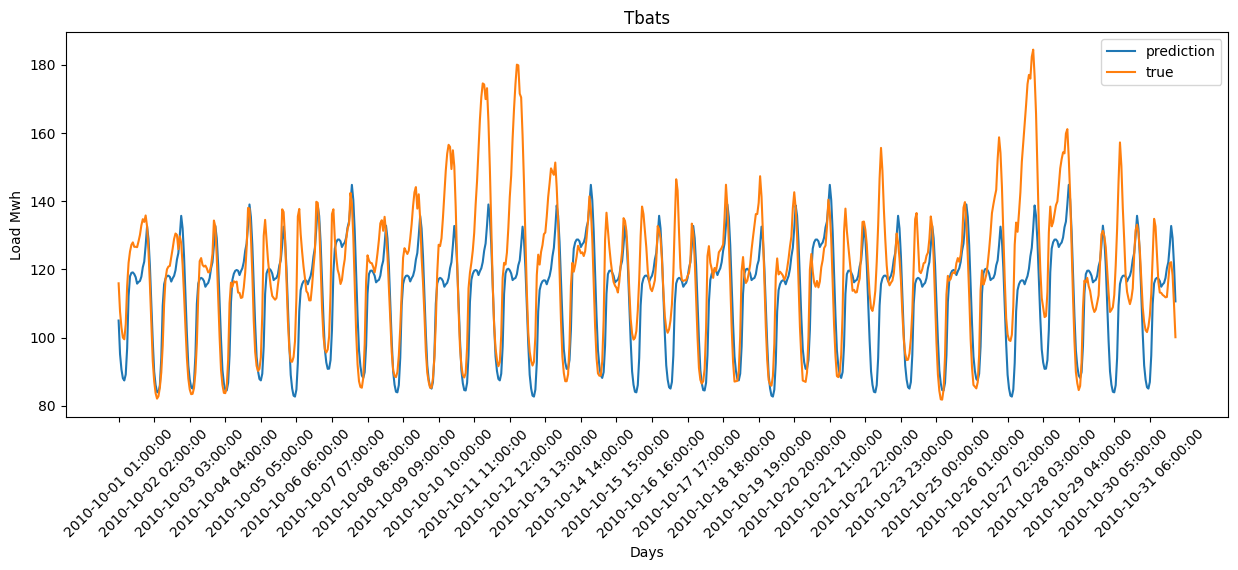

In [10]:
# plot result
plt.figure(figsize=(15,5))
plt.plot(y_hat, label="prediction")
plt.plot(df_test["DS"],y_test, label="true")

plt.xticks(np.arange(0,len(y_test)+1,25), rotation=45)

plt.xlabel("Days")
plt.ylabel("Load Mwh")
plt.title("Tbats")
plt.legend()
plt.show()


In [9]:
# error measure
np.sqrt(mean_squared_error(y_test, y_hat))

15.088647146659744

Save model

In [7]:
# pickle.dump(tbats,open("/Users/luca/Desktop/ThesisKernelMethods/experiments/point/models/tbats_load.pkl", "wb"))

tbats=pickle.load(open("/Users/luca/Desktop/ThesisKernelMethods/experiments/point/models/tbats_load.pkl", "rb"))